## **Tanzanian Water Wells Prediction**


![Alt text](well-img.jpg)

## Business Understanding 

### Problem Statement 

Tanzania is an East African country situated south of the Equator . Tanzania National Bureau of Statistics estimates a population of 61.8 million people. A publication done by World Bank estimates that 61% of the population has acces to basic water supply , this has been made possible through programs such as the Water Sector Development Program, since the commencement of the project, Tanzania has made significant progress towards access to water, sanitation and hygiene services, half the population now has access to clean water in the rainy season and two-thirds of the population during the dry season.

Despite the significant progress made, a considerable amount of the population still suffers from adverse effects of inadequate water supply and sanitation. Tanzania has had to contend  with death and disease as an immediate consequence of this with the burden falling heaviest on women, children, the poor and the vulnerable. 

The UN-Habitat in partnership with government wants to set up an initiative to curb this problem by looking into faultiness of water pumps in existing water wells. Some water pumps are functional but in need of maintenance while others are simply non-functional. 

My task as a data scientist is to be able to locate patterns in non-fuctional wells with the aim of providing insights on the core factors to consider while building the wells. These patterns will enable our stakeholders to accurately predict water pumps that need maintenance and water points that the stakeholders should chanel their resources to.


### Objectives
* To identify the patterns in functional and non-functional wells.

* To identify features to consider when building wells.

* To predict the functionality of a well based on the features provided.


### Evaluation Metrics for Success

1. Have a recall score of 84% and above 

2. Have an accuracy score of 92% and above 

## Data Understanding

Load Libraries 

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE 


Load Data

In [3]:
# loading training set values and training set labels data

def read_data(path):

    data = pd.read_csv(path)

    return data

df_1 = read_data(r'C:\Users\user\Documents\Tanzania Water Wells\training set values.csv')
df_2 = read_data(r'C:\Users\user\Documents\Tanzania Water Wells\training set labels.csv')

In [4]:
# combining the two datasets 

def combined_dataframe(data_0, data_1):

    new_df = data_0.set_index('id').join(data_1.set_index('id'))

    return new_df

df = combined_dataframe(df_1, df_2)
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
# checking the columns of our dataset

def read_columns(data):

    columns = data.columns

    return columns
    

read_columns(df)

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [9]:
# previewing the shape and information of our dataframe 

def get_info_shape(data):

    print(f'The shape of our dataset is: {data.shape}')
    print(f'with {data.shape[0]} number of rows')
    print(f'and {data.shape[1]} columns')
    print('********************************************************')
    print('********************************************************')
    print(data.info())

    
get_info_shape(df)   

The shape of our dataset is: (59400, 40)
with 59400 number of rows
and 40 columns
********************************************************
********************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region    

In [14]:
# statistical analysis of our dataset 
def statistical_analysis(data):
    return data.describe()

statistical_analysis(df)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [20]:
# checking to see the data types in our dataset  

def data_types(data):

    print("Our dataset has", len( data.select_dtypes(include='number').columns),
                "numeric columns")
    
    print("and", len(data.select_dtypes(include='object').columns),
          "categorical columns")

    print('Numerical Columns: ', data.select_dtypes(include='number').columns)
    print('Categorical Coulumns: ', data.select_dtypes(include='object').columns)

data_types(df) 

Our dataset has 9 numeric columns
and 31 categorical columns
Numerical Columns:  Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'construction_year'],
      dtype='object')
Categorical Coulumns:  Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


From the analysis we have been doing, the number of rows we have favors our modelling. The longer your data the better. We have a total of 40 columns 9 of which have numerical data while 31 columns have categorical data 

* Numerical Columns

>> amount_tsh : Total static head(amount of water availabe to waterpoint)

>> gps_height : Altitude of the well

>> longitude : GPS coordinate

>> latitude : GPS coordinate

>> num_private : number of privately owned water points

>> region_code : Geographic location(coded)

>> district_code : Geographic location(coded)

>> population : population around the well

>> construction_year : Year the waterpoint was constructed

* Categorical Columns 

>> data_recorded : data of observation

>> installer : Organization that installed the well

>> funder : Who funded the well

>> wpt_name : Name of the waterpoint if there is one

>> basin : Geographic water basin

>> subvillage : Geographic location

>> region : Geographic location

>> lga : Local Government Area

>> ward : Geographic Location

>> public_meeting - True/False

>> recorded_by : Group entering this row of data

>> scheme_management : Who operates the waterpoint

>> scheme_name : Who operates the waterpoint

>> permit : If the waterpoint is permitted

>> extraction_type : The kind of extraction the waterpoint uses

>> extraction_type_group : The kind of extraction the waterpoint uses

>> extraction_type_class : The kind of extraction the waterpoint uses

>> management : How the waterpoint is managed

>> management_group : How the waterpoint is managed

>> payment : What the water costs

>> payment_type : What the water costs

>> water_quality : The quality of the water

>> quality_group : The quality of the water

>> quantity : The quantity of water

>> quantity_group : The quantity of water

>> source : The source of the water

>> source_type : The source of the water

>> source_class : The source of the water

>> waterpoint_type : The kind of waterpoint

>> waterpoint_type_group : The kind of waterpoint

>> status_group : The condition of the wells (target variable)


## Data Cleaning

### Duplicates 

In [27]:
# function to check for duplicates

duplicates = []

def check_duplicates(data):
    for i in data.duplicated():
        duplicates.append(i)
    duplicates_set = set(duplicates)
    if(len(duplicates_set) == 1):
        print('Our Dataset has no Duplicates')

    else:
        duplicates_percentage = np.round(((sum(duplicates)/len(data)) * 100 ), 2)
        print(f'Duplicated rows constitute of {duplicates_percentage} % of our dataset')
        

check_duplicates(df)

Duplicated rows constitute of 0.06 % of our dataset


In [28]:
# dropping duplicated values 

def drop_duplicates(data):
    data = data.drop_duplicates(inplace = True)
    return data

drop_duplicates(df)

In [29]:
""" Simple function to just check the shape of our DataFrame"""

def shape(data):
    data_shape = data.shape
    return data_shape

shape(df)

(59364, 40)

### Outliers 

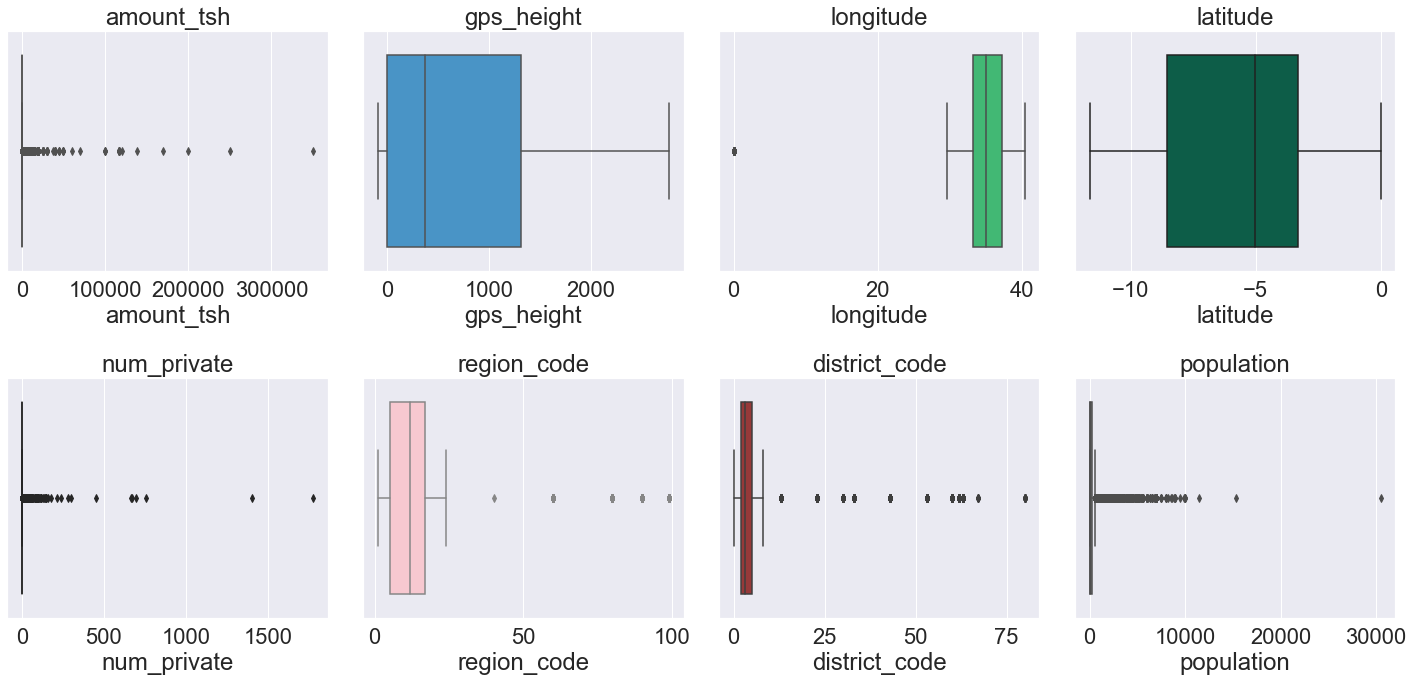

In [44]:
# visualizing outliers in our numerical data
 
def plot_boxplots(data, cols):
    fig, axes = plt.subplots(2, 4, figsize=(20,10))
    axes = axes.ravel()
    sns.set(font_scale=2.0)

    colors = ["#9b59b6", "#3498db", "#2ecc71", "#006a4e", 'purple', 'pink', 'brown', 'gray']

    for i, col in enumerate(cols[:8]):

        # convert the x-axis variable to a numeric data type
        
        data[col] = data[col].astype(float)
        sns.boxplot(x=data[col], ax=axes[i], color=colors[i])
        
        axes[i].set_title(col)
    plt.tight_layout()

# specify the columns to plot

cols = df.select_dtypes(include='number').columns

# call the plot_boxplots function

plot_boxplots(df, cols)

As per our visualization we see that we have outliers present in the amount_tsh column, num_private column, region and district code column and the population. Amount Total Static Head (amount_tsh), static measures the total vertical distance that a pump raises water. Total Static Head refers to the vertical height of a stationary column of liquid produced by a pump, measured from the suction level. In simpler terms we can also say its the pressure at a specific point in the system 


![Alt text](total%20static%20head.jpg)

The oultiers on the amount_tsh are valid . There are a true reflection of the pressure a water pump can generate. It is possibe to even have a Total Static Head of 350000.0 which is the maximum value on the column. Therefore we will not be removing any outliers from this column.

The population column shares in the same aspect as the amount_tsh column, its possible to have a population of 30,000 individuals in a region. Therefore we will not be removing any outliers

We will not delve much into the region code and the division code, these are international standard denomination for country subdivisions that have already been established 

For the num_private column we will further explore our data to determine whether the outliers are valid.